In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
df=pd.read_csv("C:\\Desktop\diabetes.csv")
from sklearn.preprocessing import StandardScaler

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False     True  False   
1          False    False          False          False     True  False   
2          False    False          False           True     True  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False     True  False   
765        False    False          False          False    False  False   
766        False    False          False           True     True  False   
767        False    False          False          False     True  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

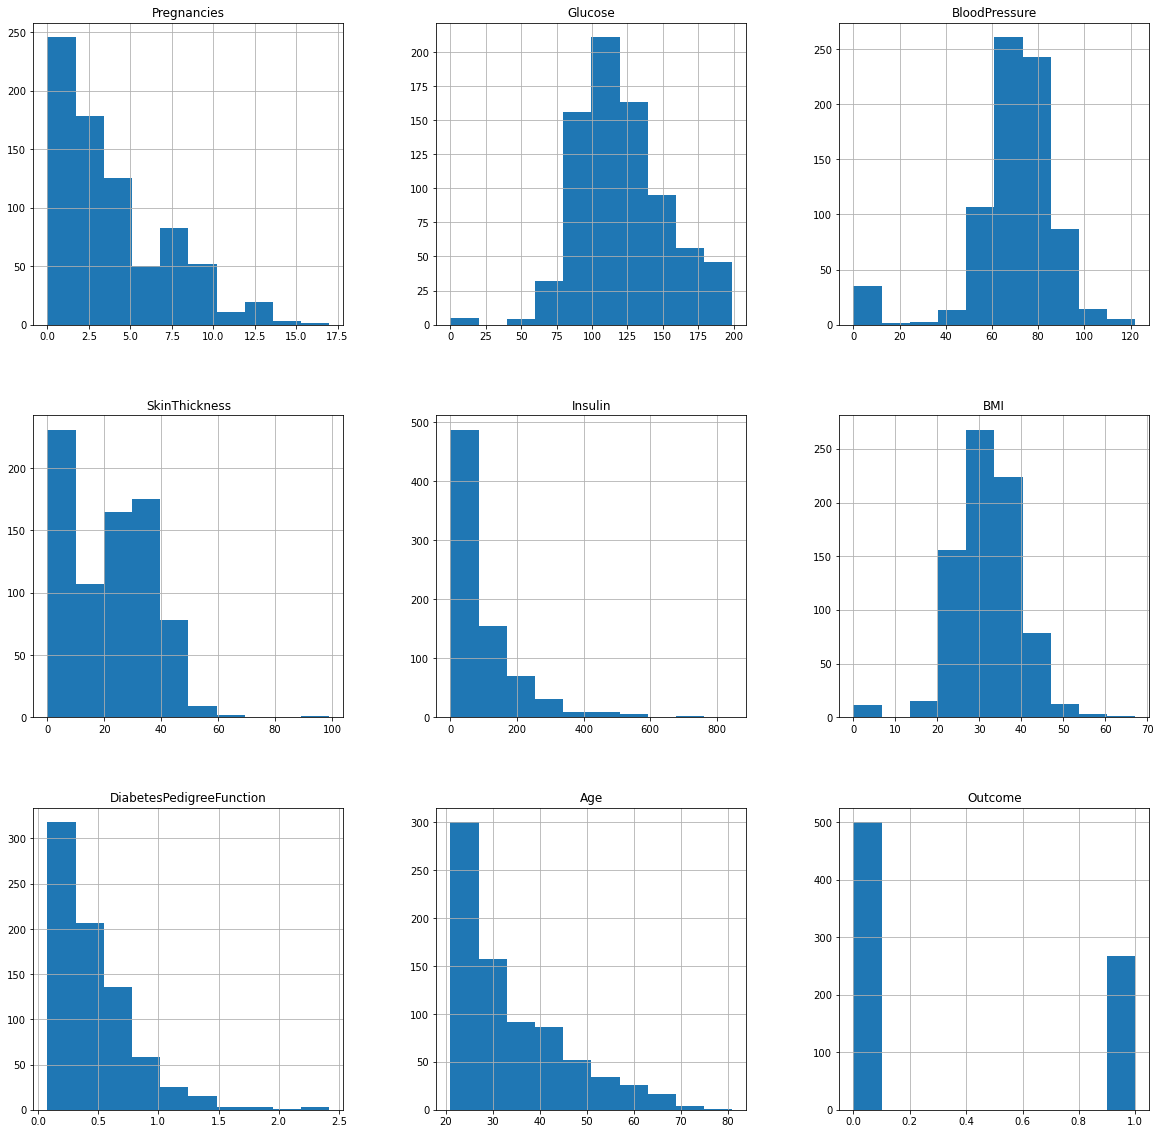

In [10]:
p=df.hist(figsize=(20,20))

In [11]:

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)


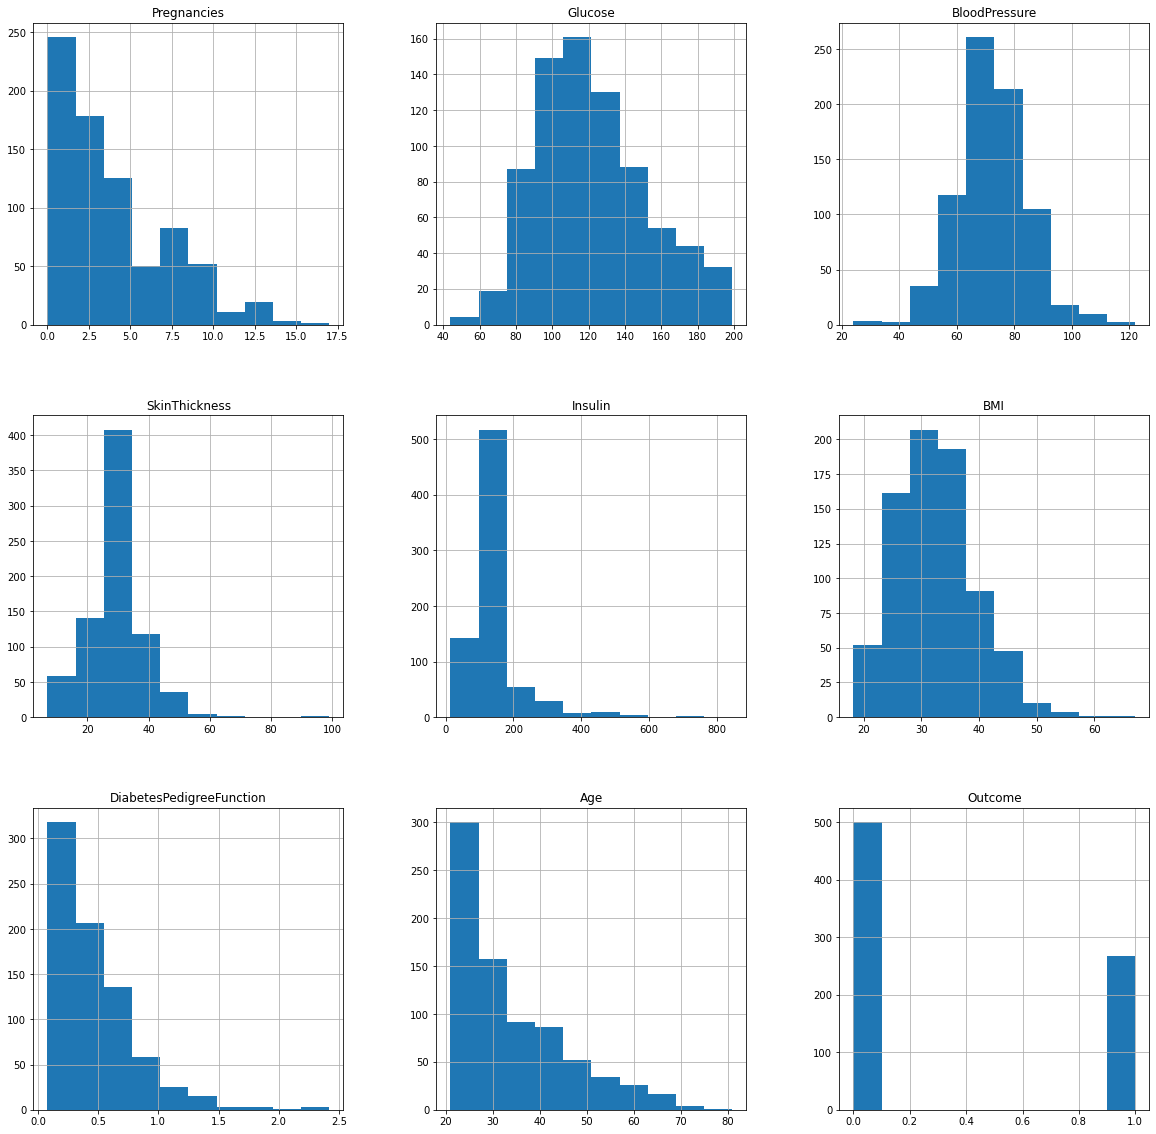

In [12]:
p=df_copy.hist(figsize=(20,20))

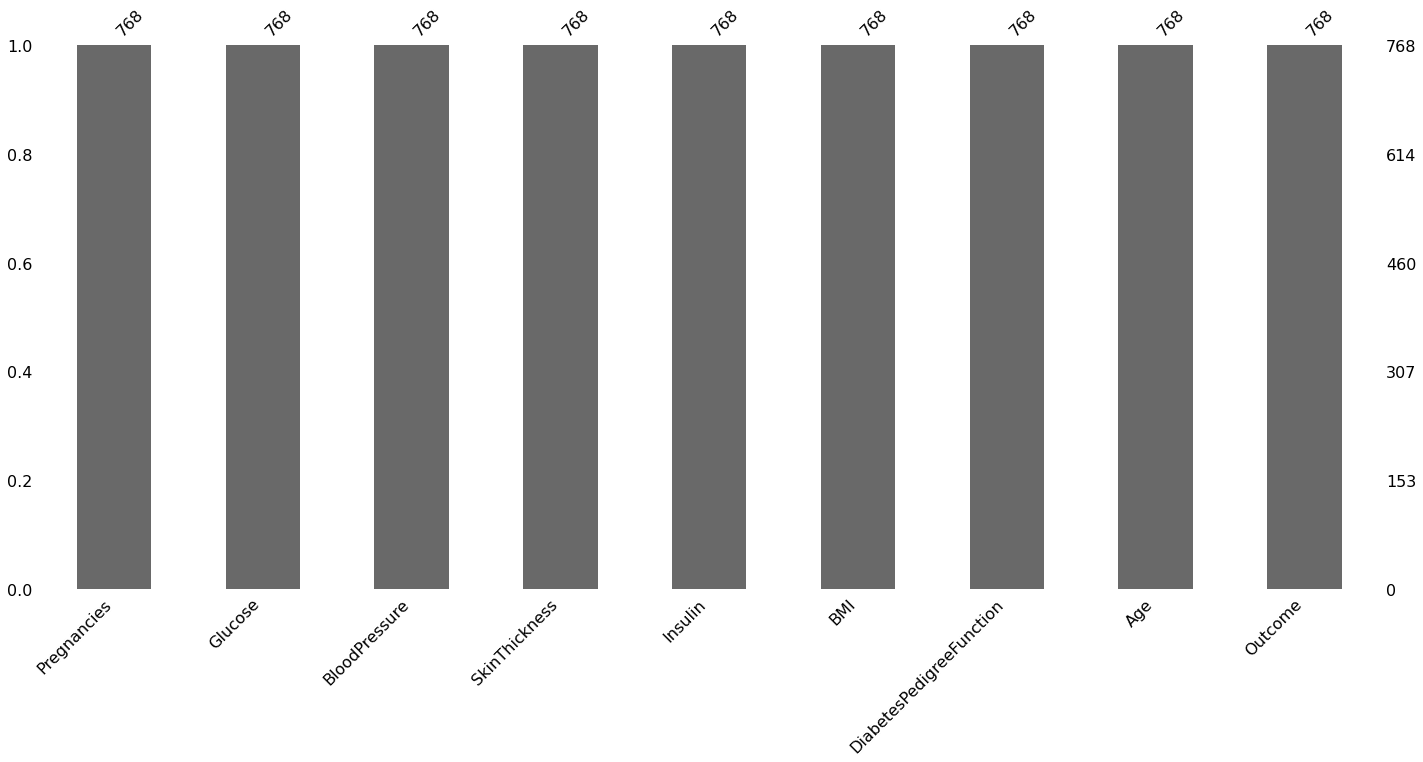

In [13]:
import missingno as msno
p=msno.bar(df)

0    500
1    268
Name: Outcome, dtype: int64


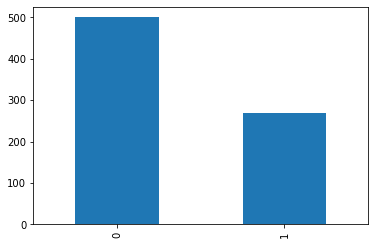

In [14]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

C:\Users\RYZEN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


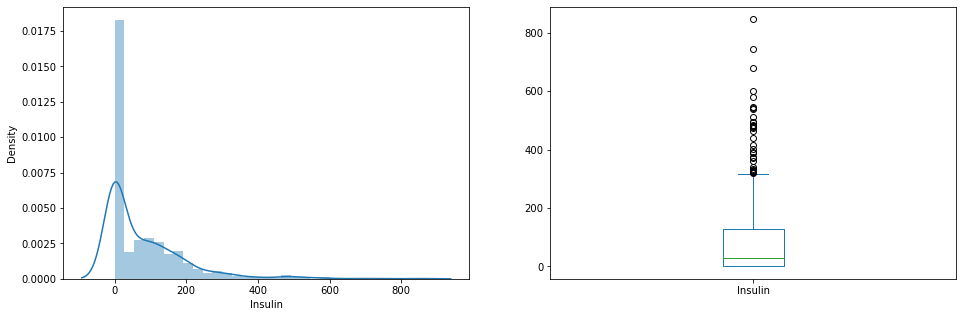

In [15]:
import seaborn as sns
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

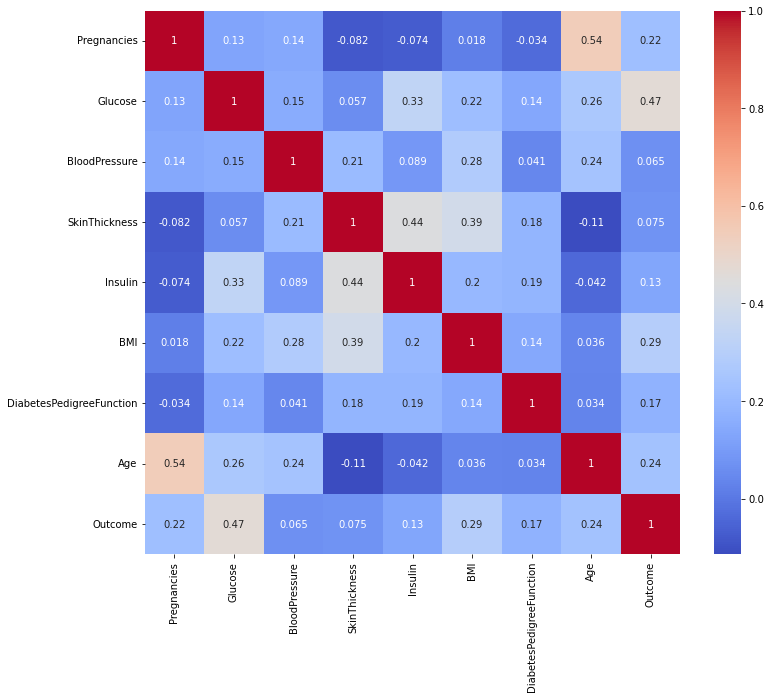

In [16]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='coolwarm')

In [17]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


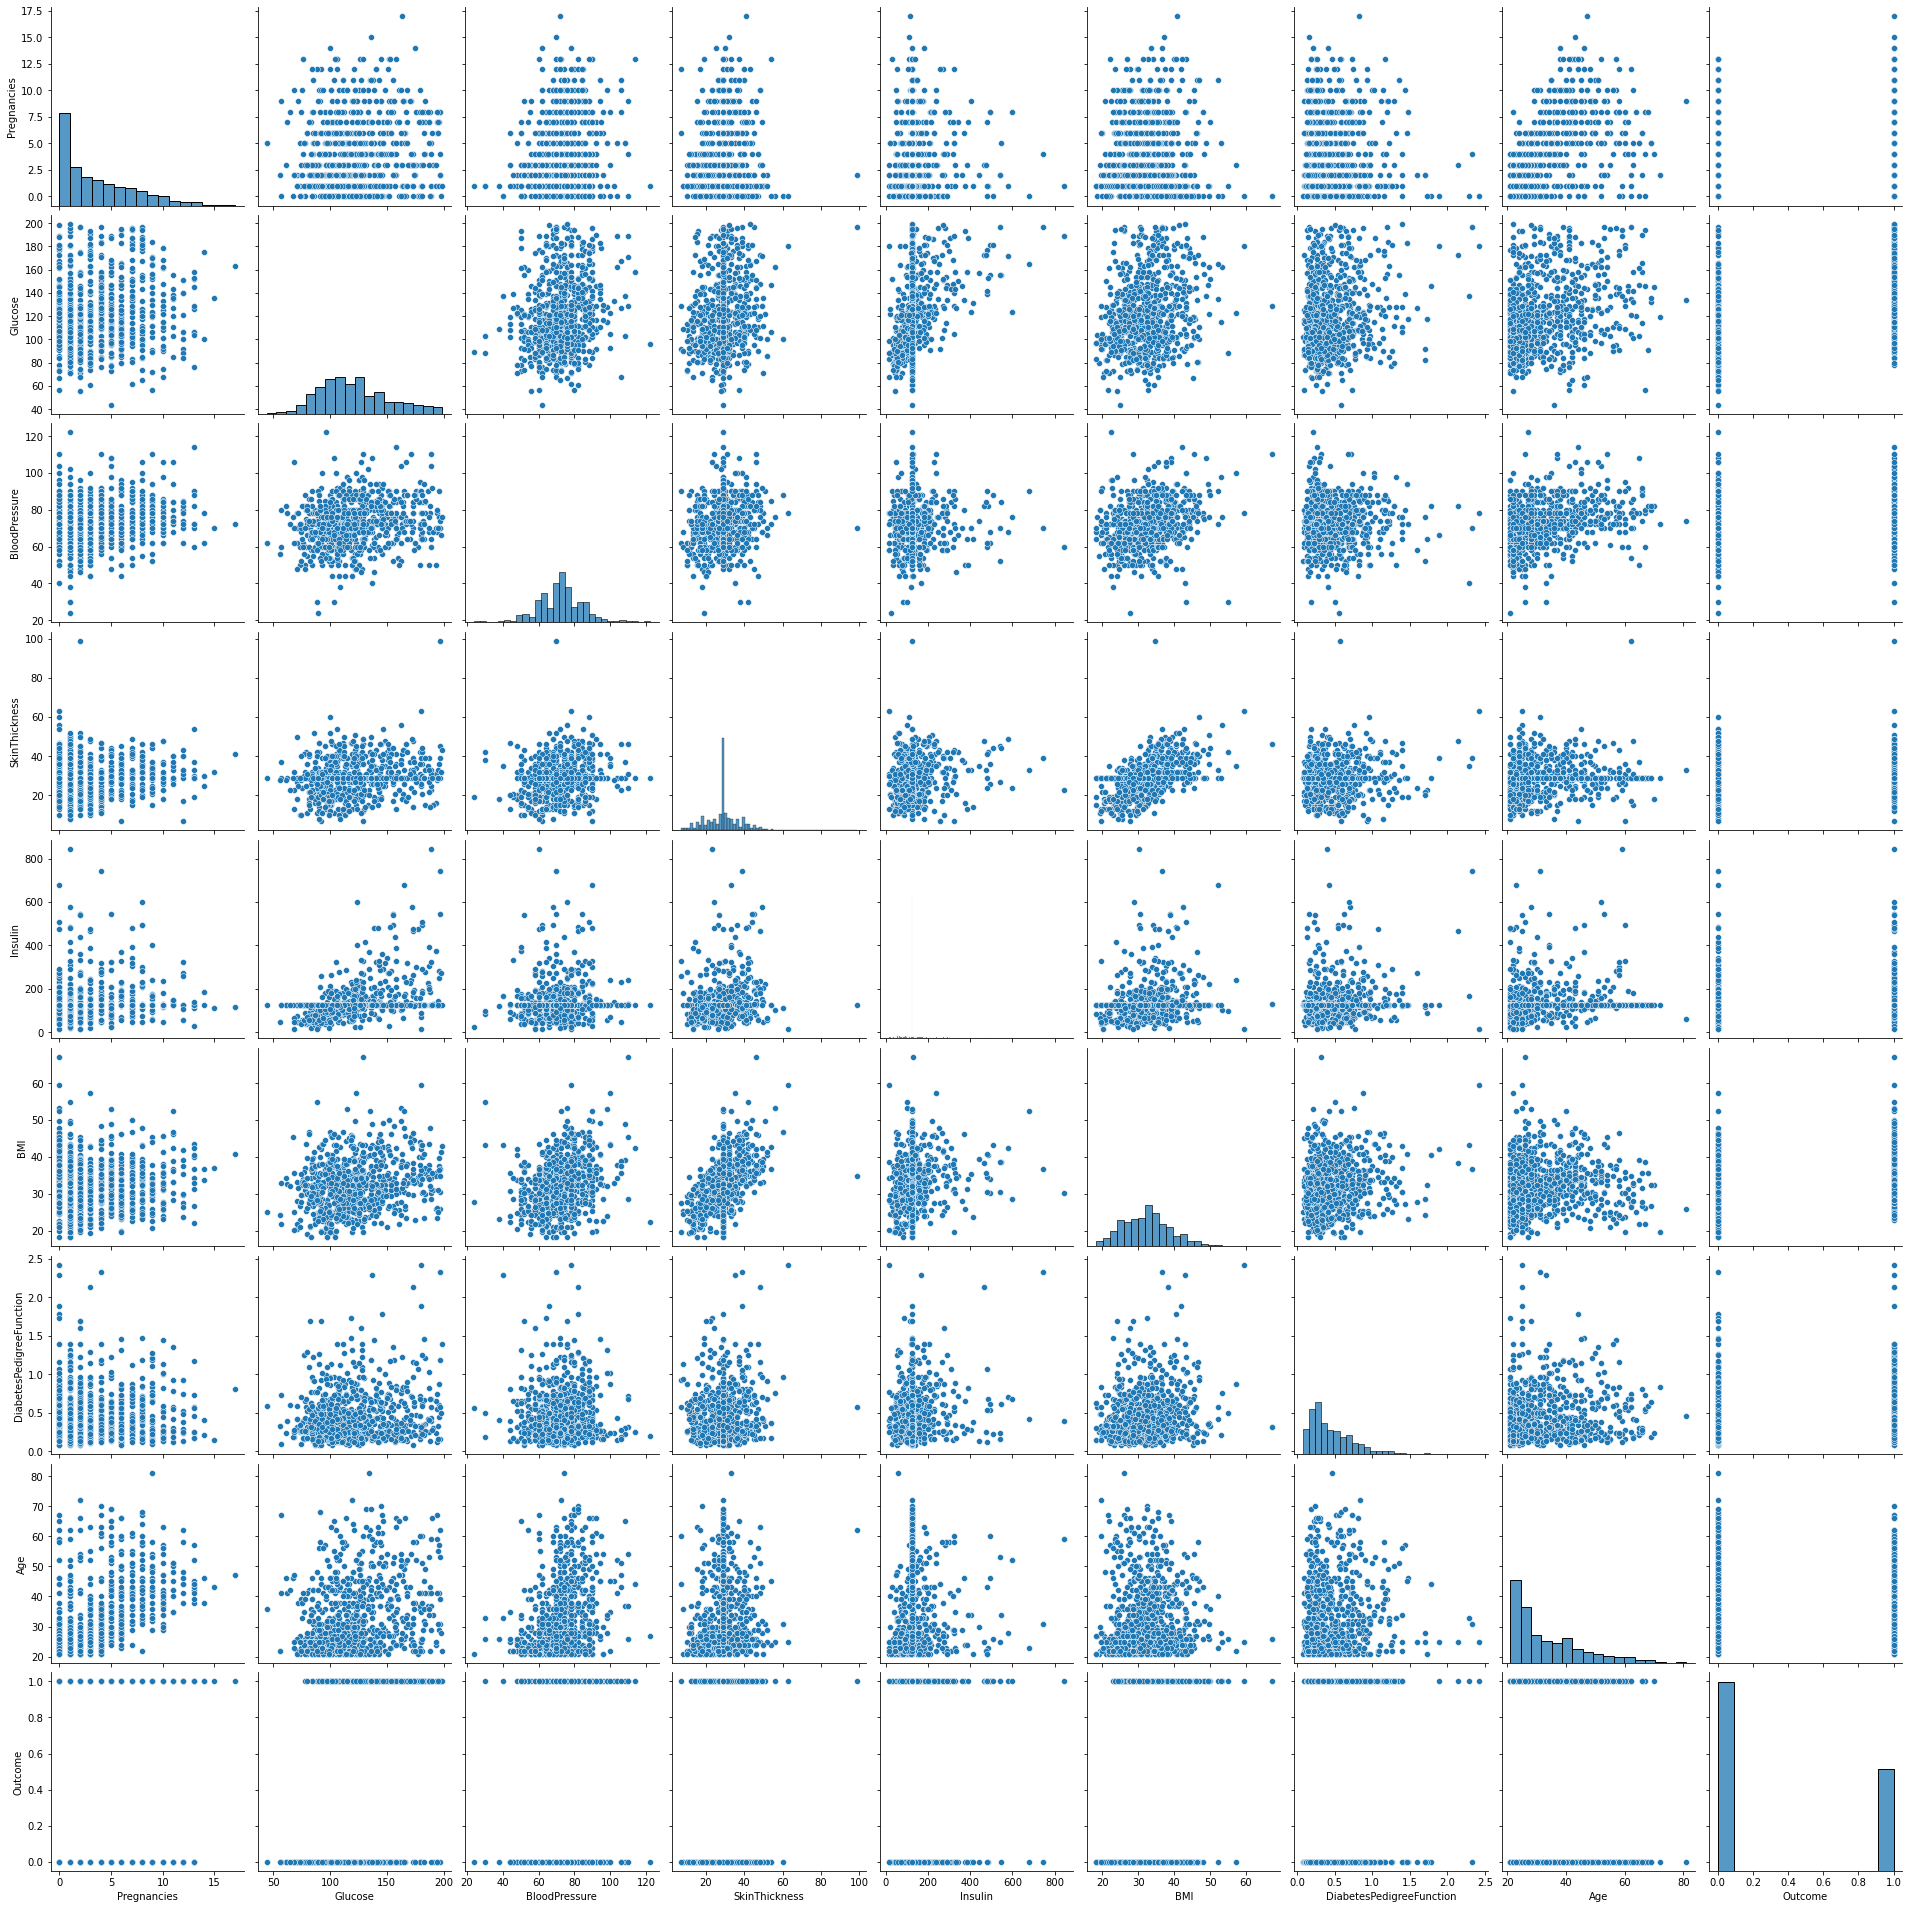

In [18]:
sns.pairplot(df_copy,height=3)

In [20]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [23]:
d={}


In [24]:
#random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train, y_train)
rf=forest.score(X_test,y_test)
d['RandomForestClassifier']=rf
print('Accuracy on Test Random Forest Classfier : ', rf)

Accuracy on Test Random Forest Classfier :  0.7559055118110236


In [25]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
kn=knn.score(X_test,y_test)
d['KNeighborsClassifier']=kn
print('Accuracy on Test KNN : ', kn)

Accuracy on Test KNN :  0.6929133858267716


In [26]:
#Gaussian Neighbour
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gn=gnb.score(X_test,y_test)
d['GaussianNB']=gn
print('Accuracy on Test KNN : ', gn)

Accuracy on Test KNN :  0.7440944881889764


In [27]:
#SVC
from sklearn.svm import SVC
machine=SVC()
machine.fit(X_train,y_train)
m=machine.score(X_test,y_test)
d['SVM']=m
print('Accuracy on Test data SVC : ', m)

Accuracy on Test data SVC :  0.7480314960629921


In [30]:
#Descision tree 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt=dtc.score(X_test,y_test)
d['DecisionTreeClassifier']=dt

In [31]:
print('Accuracy on Test data Descision Tree Classfier : ', dt)

Accuracy on Test data Descision Tree Classfier :  0.7165354330708661


In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
l=log_reg.score(X_test,y_test)
d['LogisticRegression']=l
print('Accuracy on Test data Logistic Regression : ', l)

Accuracy on Test data Logistic Regression :  0.7874015748031497


C:\Users\RYZEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
d

{'RandomForestClassifier': 0.7559055118110236,
 'KNeighborsClassifier': 0.6929133858267716,
 'GaussianNB': 0.7440944881889764,
 'SVM': 0.7480314960629921,
 'DecisionTreeClassifier': 0.7165354330708661,
 'LogisticRegression': 0.7874015748031497}

In [34]:
da=pd.DataFrame.from_dict([d])
da

,RandomForestClassifier,KNeighborsClassifier,GaussianNB,SVM,DecisionTreeClassifier,LogisticRegression
0,0.755906,0.692913,0.744094,0.748031,0.716535,0.787402


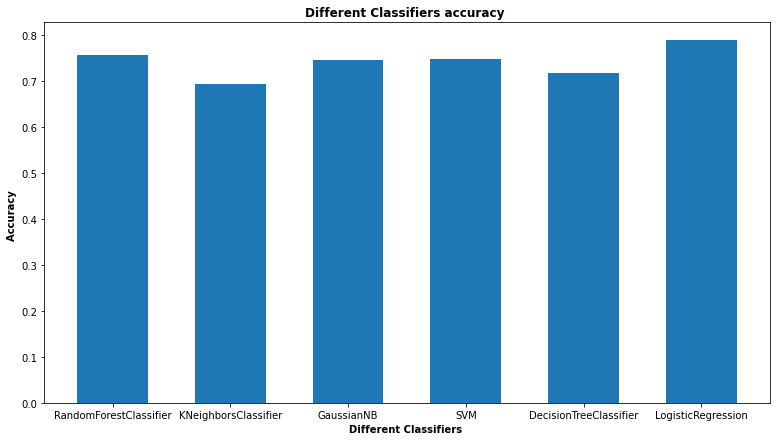

In [35]:
import matplotlib
data=d.keys()
value=d.values()
matplotlib.rcParams["figure.figsize"] = (13,7)
plt.bar(data,value,width=0.6)
plt.xlabel('Different Classifiers ',fontweight='bold')
plt.ylabel('Accuracy ',fontweight='bold')
plt.title('Different Classifiers accuracy ',fontweight='bold')
plt.show()

In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log_reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\RYZEN\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
import pickle

In [38]:
filename = "trained_model.sav"  # sav = saved file

pickle.dump(log_reg, open(filename, "wb"))    # w=write & b=binary

In [39]:
loaded_model = pickle.load(open("trained_model.sav", "rb"))

In [40]:
input_data = (5,166,72,19,175,25.8,0.587,51)

#changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0])==0:
    print("The Person is Non Diabetic")
else:
    print("The Person is Diabetic")

[1]
The Person is Diabetic


C:\Users\RYZEN\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
